# Redes neurais

Neste colab, veremos o funcionamento de uma rede neural implementada usando matrizes. Vamos supor um dataset com 2 atributos preditivos e 1 atributo alvo em um problema de classificação. Todo o exemplo será executado em apenas uma amostra desse dataset, vamos supor que a entrada é `x=[2,4]` e a saída é `y=1`.

A rede neural a ser implementada tem 2 entradas, 3 neurônios na camada 1, 2 neurônios na camada 2 e 1 neurônio de saída. A figura abaixo ilustra a arquitetura. Todos os neurônios terão ativação sigmoide (logística).

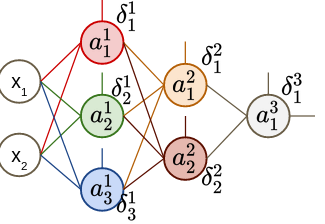

## Imports, função de ativacao e derivada



In [1]:
import unittest
import numpy as np
from math import exp

def sigmoid(z):
  return 1/(1+np.exp(-z))

def deriv_sigmoid(z):
  return sigmoid(z)*(1-sigmoid(z))

test = unittest.TestCase()  # pros testes das implementacoes

## Forward pass

Nas células a seguir, vamos implementar o cálculo da predição da rede (forward pass) conforme equação abaixo. A camada 1 está pronta, analise o código para fazer parecido nas demais.

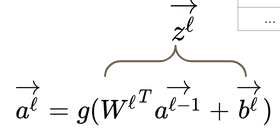

### Camada 1

A camada 1 tem 2 entradas e 3 neurônios. A matriz de pesos é 2x3. Os pesos estão inicializados conforme a planilha em https://docs.google.com/spreadsheets/d/1hmQB1yGUo9zezlxESmO0klBpLsUp86ELqhzCLrnAAYo/edit?usp=sharing.

Na matriz de pesos W1, os pesos do primeiro neurônio estão na primeira coluna: 2 (que multiplica x1) e -2 que multiplica x2. Os pesos do segundo neurônio estão na segunda coluna e assim por diante. Cada neurônio tem um bias e o vetor b contém os biases dos 3 neurônios (3 é o bias do primeiro neurônio e assim por diante).

Note os "`reshape`" em b1 e em x. Eles são importantes para "forçar" o formato apropriado. Por exemplo, se `reshape` não é feito em b1, ele fica com formato (3,) ao invés de (3,1). Isso dá problemas posteriores nas multiplicações de matrizes.

O cálculo do potencial de ativação segue a equação abaixo. Note que, no numpy, é necessário usar o @ para multiplicação de matrizes. Caso contrário ele faz a multiplicação elemento a elemento. Confira os resultados com sua implementação na planilha.

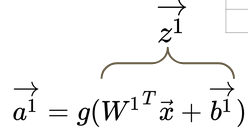

In [2]:
W1 = np.array([
    [ 2, 1, -1],
    [-2,-1, .5]
])

b1 = np.array([
    3, 2, 3
]).reshape(3,1)

x = np.array([
    2, 4
]).reshape(2,1)

z1 = (W1.T @ x) + b1

print(z1)

a1 = sigmoid(z1)
print(a1)

[[-1.]
 [ 0.]
 [ 3.]]
[[0.26894142]
 [0.5       ]
 [0.95257413]]


### Camada 2

A camada 2 tem 2 neurônios e recebe como entradas as 3 ativações da camada 1. Portanto a matriz de pesos é 3x2.
Preencha a matriz de pesos e os biases conforme os valores [da planilha](https://docs.google.com/spreadsheets/d/1hmQB1yGUo9zezlxESmO0klBpLsUp86ELqhzCLrnAAYo/edit?usp=sharing) (e.g. os pesos do primeiro neurônio são 0, -1 e 1).

Preencha também os biases da camada 2. Lembre-se de usar reshape pra forçar o formato apropriado.

Escreva os cálculos do potencial e da ativação. A equação, [conforme os slides](https://docs.google.com/presentation/d/1JO4zfSC-R1uMPmGGCPNEdIkKybS3UrXzyZemyj0xfOo/edit#slide=id.g1ea611f45f2_1_857) é:

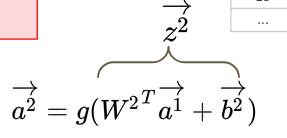



A célula posterior realiza os testes.

In [3]:
W2 = np.array([
    [0, 0],
    [-1, 1],
    [1, 1]
])

b2 = np.array([
    2, -1
]).reshape(2, 1)

# faca o calculo dos potenciais de ativacao da camada 2
z2 = (W2.T @ a1) + b2
print(z2)

# faca o calculo das ativacoes da camada 2
a2 = sigmoid(z2)
print(a2)

[[2.45257413]
 [0.45257413]]
[[0.92074949]
 [0.61125108]]


#### Testes da camada 2

In [4]:
# teste dos formatos de W2 e b
test.assertEqual((3,2), W2.shape)
test.assertEqual((2,1), b2.shape, "Formato errado de b, talvez faltou reshape?")

# teste do formato de z e a
test.assertEqual((2,1), z2.shape)
test.assertEqual((2,1), a2.shape)


# teste dos calculos
z_expected = np.array([2.45257413, 0.45257413]).reshape((2,1))
a_expected = np.array([0.92074949,0.61125108]).reshape((2,1))

test.assertTrue(np.allclose(z_expected, z2))
test.assertTrue(np.allclose(a_expected, a2))

### Camada 3
A camada 3 tem 1 neurônios e recebe como entradas as 2 ativações da camada 2. Portanto a matriz de pesos é 2x1.
Preencha a matriz de pesos e os biases conforme os valores [da planilha](https://docs.google.com/spreadsheets/d/1hmQB1yGUo9zezlxESmO0klBpLsUp86ELqhzCLrnAAYo/edit?usp=sharing) (e.g. os pesos do neurônio são -1 e 2).

Preencha também o biase da camada 3. Apesar de ser apenas um número, implemente como uma "matriz" 1x1. Lembre-se de usar reshape pra forçar o formato apropriado.

Escreva os cálculos do potencial e da ativação. A equação, [conforme os slides](https://docs.google.com/presentation/d/1JO4zfSC-R1uMPmGGCPNEdIkKybS3UrXzyZemyj0xfOo/edit#slide=id.g1ea611f45f2_1_907) é:

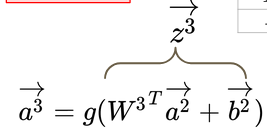

A célula posterior realiza os testes.

In [5]:
W3 = np.array([
    [-1],
    [2]
])

b3 = np.array(
    [-1]
).reshape(1, 1)

# faca o calculo do potencial de ativacao da camada 3
z3 = (W3.T @ a2) + b3
print(z3)

# faca o calculo da ativacao da camada 3
a3 = sigmoid(z3)
print(a3)

[[-0.69824733]]
[[0.33220093]]


#### Testes da camada 3

In [6]:
# teste dos formatos de W3 e b3
test.assertEqual((2,1), W3.shape)
test.assertEqual((1,1), b3.shape, "Formato errado de b, talvez faltou reshape?")

# teste do formato de z e a
test.assertEqual((1,1), z3.shape)
test.assertEqual((1,1), a3.shape)

# teste dos calculos
z_expected = np.array([-0.69824733]).reshape((1,1))
a_expected = np.array([0.33220093]).reshape((1,1))

test.assertTrue(np.allclose(z_expected, z3))
test.assertTrue(np.allclose(a_expected, a3))

## Backprop

Hora da retropropagação de erros. A regra é: erro na saída = predição - alvo. Nas demais camadas é conforme equação abaixo, onde x é multiplicação de matrizes e "bolinha" é multiplicação elemento a elemento:

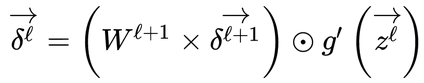

### Camada 3 (de saída)

O erro de saída é o mais fácil: ativação final - valor alvo. No nosso caso, o alvo é 1. A célula abaixo implementa o cálculo.

In [7]:
d3 = np.array(a3 - 1)
d3

array([[-0.66779907]])

### Camada 2

Há dois neurônios na camada 2, portanto o vetor de erros deve ter 2 elementos. O cálculo abaixo implementa a equação para o cálculo de erros na camada 2.

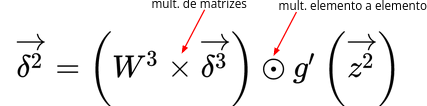

In [8]:
d2 = (W3 @ d3) * deriv_sigmoid(z2)
d2

array([[ 0.04872921],
       [-0.3173691 ]])

### Camada 1

Implemente o cálculo do vetor de erros da camada 1, conforme equação abaixo. O vetor de erros deve ter 3 elementos (1 pra cada neurônio da camada 1).

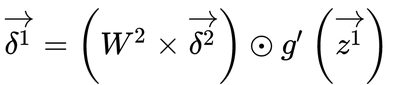

A célula posterior faz o teste.

In [9]:
d1 = (W2 @ d2) * deriv_sigmoid(z1)
d1

array([[ 0.        ],
       [-0.09152458],
       [-0.01213625]])

In [10]:
#teste do formato
test.assertEqual((3,1), d1.shape)

# teste dos valores (3 decimais de precisao)
d_expected = np.array([ 0, -0.09152458, -0.01213625]).reshape(3,1)
test.assertTrue(np.allclose(d_expected, d1))

## Atualização de parâmetros

A ordem das camadas não é importante, todas podem, inclusive, serem atualizadas em paralelo após os erros terem sido calculados. A regra geral, em forma matricial, segue abaixo. Quando a multiplicação de matrizes é feita, o resultado é que cada peso é atualizado conforme a regra: `peso <- peso - alpha * delta * entrada` e cada bias: `bias <- bias - alpha*delta`
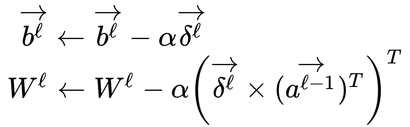

### Camada 3

A implementação dos cálculos pra camada 3 está feita. Vamos supor alpha = 0.1 pra essa e as demais atualizações. nW3 e nb3 armazenarão a nova matriz de pesos e vetor de biases da camada 3. A nomenclatura pras demais camadas será similar.

In [11]:
alpha = 0.1

nW3 = W3 - alpha*(d3 @ a2.T).T
nb3 = b3 - alpha*d3
nW3, nb3

(array([[-0.93851244],
        [ 2.04081929]]),
 array([[-0.93322009]]))

### Camada 2

Implemente as atualizações dos parâmetros da camada 2. A equação abaixo conteḿ a atualização dos pesos, siga a equação geral para atualização do vetor de bias, pois ele é mais simples. O teste é feito na célula a seguir.

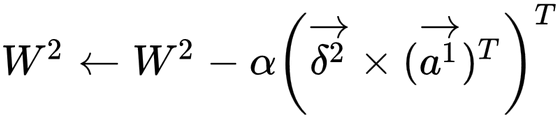

In [12]:
nW2 = W2 - alpha*(d2 @ a1.T).T
nb2 = b2 - alpha*d2
nW2, nb2

(array([[-0.00131053,  0.00853537],
        [-1.00243646,  1.01586845],
        [ 0.99535818,  1.03023176]]),
 array([[ 1.99512708],
        [-0.96826309]]))

In [13]:
# teste dos formatos
test.assertEqual((3,2), nW2.shape)
test.assertEqual((2,1), nb2.shape)

# teste dos valores
W_expected = np.array([
    [-0.00131053,  0.00853537],
    [-1.00243646,  1.01586845],
    [ 0.99535818,  1.03023176]]
)
test.assertTrue(np.allclose(W_expected, nW2))

b_expected = np.array([1.99512708,-0.96826309]).reshape(2,1)
test.assertTrue(np.allclose(b_expected, nb2))



### Camada 1

Implemente as atualizações dos parâmetros da camada 1. A equação abaixo conteḿ a atualização dos pesos, siga a equação geral para atualização do vetor de bias, pois ele é mais simples. O teste é feito na célula a seguir.

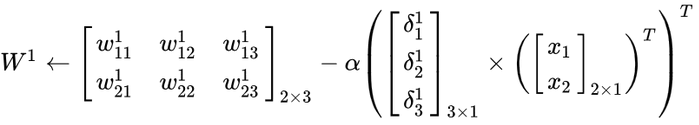

In [14]:
nW1 = W1 - alpha*(d1 @ x.T).T
nb1 = b1 - alpha*d1
nW1, nb1

(array([[ 2.        ,  1.01830492, -0.99757275],
        [-2.        , -0.96339017,  0.5048545 ]]),
 array([[3.        ],
        [2.00915246],
        [3.00121363]]))

In [16]:
# teste dos formatos
test.assertEqual((2,3), nW1.shape)
test.assertEqual((3,1), nb1.shape)

# teste dos valores
W_expected = np.array([
    [ 2,  1.01830492, -0.99757275],
    [-2, -0.96339017,  0.5048545 ]
])
test.assertTrue(np.allclose(W_expected, nW1))

b_expected = np.array([3, 2.00915246, 3.00121363]).reshape(3,1)
test.assertTrue(np.allclose(b_expected, nb1))

## Epílogo

Todo esse trabalho foi para o processamento de apenas UMA instância do conjunto de dados (a qual assumimos que tivesse como entrada x=[2,4] e como alvo y=1.

Para implementação de uma época de treinamento, todas as etapas (forward pass, backprop, atualização de pesos) devem ser repetidas para as demais instâncias do dataset. E isso deve ser repetido pelo número desejado de épocas.

Para os nossos propósitos do entendimento do funcionamento da rede neural, a implementação do algoritmo completo não é necessária, pois todos os componentes já foram executados, mas caso deseje, fica aqui o incentivo para encarar esse desafio.

In [37]:
alpha = 0.1
epochs = 20

x = np.array([
    [2],
    [4],
])

y = np.array([1]).reshape(1,1)

W1 = np.array([
    [2, 1, -1],
    [-2, -1, 0.5],
]).reshape(2, 3)

W2 = np.array([
    [0, 0],
    [-1, 1],
    [1, 1],
]).reshape(3, 2)

W3 = np.array([
    [-1],
    [2],
]).reshape(2, 1)

b1 = np.array([3, 2, 3]).reshape(3,1)
b2 = np.array([2, -1]).reshape(2,1)
b3 = np.array([-1]).reshape(1,1)

for epoch in range(epochs):
    print("Época: ", epoch+1)

    # Forward pass:
    z1 = W1.T @ x + b1
    a1 = sigmoid(z1)
    z2 = W2.T @ a1 + b2
    a2 = sigmoid(z2)
    z3 = W3.T @ a2 + b3
    a3 = sigmoid(z3)

    # Backpropagation -> cálculo dos erros e
    # definição dos novos pesos.
    # d = delta = erro
    d3 = np.array(a3 - y).reshape(1, 1)
    d2 = (W3 @ d3) * deriv_sigmoid(z2)
    d1 = (W2 @ d2) * deriv_sigmoid(z1)

    nW3 = W3 - alpha*(d3 @ a2.T).T
    nb3 = b3 - alpha*d3
    W3, b3 = nW3, nb3

    nW2 = W2 - alpha*(d2 @ a1.T).T
    nb2 = b2 - alpha*d2
    W2, b2 = nW2, nb2

    nW1 = W1 - alpha*(d1 @ x.T).T
    nb1 = b1 - alpha*d1
    W1, b1 = nW1, nb1

    print("Erro da saída: ", d3, end="\n\n")

Época:  1
Erro da saída:  [[-0.66779907]]

Época:  2
Erro da saída:  [[-0.61968421]]

Época:  3
Erro da saída:  [[-0.57252535]]

Época:  4
Erro da saída:  [[-0.52776476]]

Época:  5
Erro da saída:  [[-0.48629336]]

Época:  6
Erro da saída:  [[-0.44850115]]

Época:  7
Erro da saída:  [[-0.41441997]]

Época:  8
Erro da saída:  [[-0.38386692]]

Época:  9
Erro da saída:  [[-0.35655147]]

Época:  10
Erro da saída:  [[-0.33214408]]

Época:  11
Erro da saída:  [[-0.31031557]]

Época:  12
Erro da saída:  [[-0.29075744]]

Época:  13
Erro da saída:  [[-0.2731907]]

Época:  14
Erro da saída:  [[-0.25736835]]

Época:  15
Erro da saída:  [[-0.24307443]]

Época:  16
Erro da saída:  [[-0.23012148]]

Época:  17
Erro da saída:  [[-0.21834741]]

Época:  18
Erro da saída:  [[-0.20761228]]

Época:  19
Erro da saída:  [[-0.19779531]]

Época:  20
Erro da saída:  [[-0.18879211]]

